<h2>Imports</h2>

In [1]:
test_set = "C:/Users/Theo/Documents/Unif/detection_dataset"
model_path = "C:/Users/Theo/Documents/Unif/Models/body/v8s/weights/best.pt"

import sys
sys.path.append("C:/Users/Theo/Documents/Unif/ChimpRec/Code")
from chimplib.metric import extract_ground_truth, extract_metrics, predict, merge_boxes, draw_predictions

c:\Users\Theo\Documents\Unif\ChimpRec\Code\global_venv\Lib\site-packages\torchreid\reid\metrics\rank.py:11: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  warnings.warn(


<h3>Ground truth extraction.</h3>

In [3]:
t = 0.6
t_confidence = 0.35
merging_threshold = 0.8

GT = extract_ground_truth(f"{test_set}/labels/val", f"{test_set}/images/val")
predictions = predict(model_path, f"{test_set}/images/val", t_confidence=t_confidence)
merged_predictions = merge_boxes(predictions, merging_threshold)
#predictions = merged_predictions


12_10237.jpg
12_11090.jpg
12_11944.jpg
12_12797.jpg
12_13650.jpg
12_14503.jpg
12_15356.jpg
12_16209.jpg
12_1706.jpg
12_17062.jpg
12_2559.jpg
12_3412.jpg
12_4265.jpg
12_5118.jpg
12_5972.jpg
12_6825.jpg
12_7678.jpg
12_853.jpg
12_8531.jpg
12_9384.jpg
20120201085218_1866.jpg
20120201085218_2799.jpg
20120201085218_3732.jpg
20120201085218_933.jpg
20120205165846-PAB11_10031.jpg
20120205165846-PAB11_10867.jpg
20120205165846-PAB11_11703.jpg
20120205165846-PAB11_12538.jpg
20120205165846-PAB11_13374.jpg
20120205165846-PAB11_14210.jpg
20120205165846-PAB11_15046.jpg
20120205165846-PAB11_15882.jpg
20120205165846-PAB11_1671.jpg
20120205165846-PAB11_16718.jpg
20120205165846-PAB11_17554.jpg
20120205165846-PAB11_18390.jpg
20120205165846-PAB11_19226.jpg
20120205165846-PAB11_20062.jpg
20120205165846-PAB11_20898.jpg
20120205165846-PAB11_21734.jpg
20120205165846-PAB11_22570.jpg
20120205165846-PAB11_23406.jpg
20120205165846-PAB11_24242.jpg
20120205165846-PAB11_2507.jpg
20120205165846-PAB11_25077.jpg
20120205

<h3>Computation of the model performance</h3>

In [5]:
results = extract_metrics(GT, predictions, t=t)

tp, fp, fn = results.values()

print(results)
print(f"precision={tp/(tp+fp)}")
print(f"recall={tp/(tp+fn)}")

{'true_positives': 2567, 'false_positives': 524, 'false_negatives': 444}
precision=0.8304755742478163
recall=0.852540684158087


<h2>Graphs</h2>

In [ ]:
"""
Precision and recall as a function of the confidence threshold
"""
iterators = [i/20 for i in range(1, 20, 1)]

data = dict()
n_pred_list = []

for i in iterators:
    pred = predict(model_path, test_set, i)
    results = extract_metrics(GT, pred, t=t)
    tp, fp, fn = results.values()
    if (tp+fp) == 0: precision = 0
    else: precision=tp/(tp+fp)

    if (tp+fn) == 0: recall = 0
    else: recall=tp/(tp+fn)
    data[i] = (precision, recall)
    n_pred = 0
    for values in pred.values():
        n_pred += len(values)
    n_pred_list.append(n_pred)



In [ ]:
# draw the predictions and save the images in the visualisation file 
draw_predictions(predictions, GT, test_set, "visualisation")


image 1/1 C:\Users\Theo\Documents\Unif\detection_dataset\images\val\20241006 - 07h04_frame_0302.png: 384x640 5 Bodys, 110.2ms
Speed: 2.7ms preprocess, 110.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\Theo\Documents\Unif\detection_dataset\images\val\20241006 - 07h04_frame_0448.png: 384x640 2 Bodys, 87.2ms
Speed: 2.5ms preprocess, 87.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\Theo\Documents\Unif\detection_dataset\images\val\20241006 - 07h04_frame_0479.png: 384x640 1 Body, 85.7ms
Speed: 1.9ms preprocess, 85.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\Theo\Documents\Unif\detection_dataset\images\val\20241006 - 07h04_frame_0574.png: 384x640 1 Body, 75.0ms
Speed: 2.2ms preprocess, 75.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\Theo\Documents\Unif\detection_dataset\images\val\20241006 - 07h04_frame_0652.png: 384x64

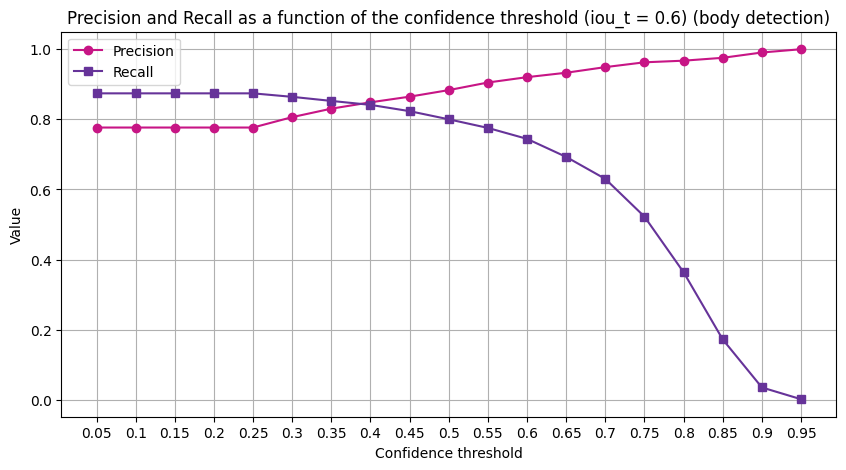

In [2]:
from chimplib.plots import PR_conft_plot

PR_conft_plot(
    model_path, 
    f"{test_set}/images/val", 
    f"{test_set}/labels/val", 
    t_iou=0.6,
    csv_path_out="C:/Users/Theo/Documents/Unif/ChimpRec/Code/Body_detection/Metric/out_temp.csv"    
)